In [1]:
# %matplotlib widget

In [2]:
import pandas as pd
import numpy as np
from lmfit import models

# Proefmeting spectroscopie

## IJking spectroscoop met behulp van een natriumlamp

In [3]:
ijking = pd.read_csv('ijking.csv')

In [4]:
ijking

,kleur,sterkte,orde,golflengte,hoek,dhoek
0,oranje,sterk,1,589.0,20.20,0.025
1,oranje,sterk,1,589.6,20.25,0.025
2,groen,matig,1,568.3,19.40,0.025
3,groen,matig,1,568.8,19.45,0.025
4,rood,zwak,1,615.4,21.20,0.100
5,rood,zwak,1,618.1,21.25,0.100
6,oranje,zwak,2,589.0,45.10,0.025
7,oranje,zwak,2,589.6,45.15,0.025


In [5]:
ijking['corr_hoek'] = ijking.hoek + 0.70
ijking['sin_hoek'] = np.sin(np.radians(ijking.corr_hoek))
ijking['d_sin_hoek'] = np.cos(np.radians(ijking.corr_hoek)) * np.radians(ijking.dhoek)
ijking['m_lambda'] = ijking.orde * ijking.golflengte

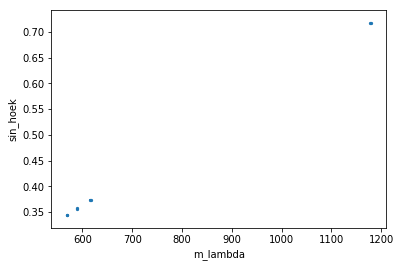

In [6]:
ijking.plot.scatter('m_lambda', 'sin_hoek', yerr='d_sin_hoek', s=5);

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 8
    # variables        = 2
    chi-square         = 2.60981003
    reduced chi-square = 0.43496834
    Akaike info crit   = -4.96131287
    Bayesian info crit = -4.80242979
[[Variables]]
    intercept: -0.00334099 +/- 2.9508e-04 (8.83%) (init = 0)
    slope:      6.1137e-04 +/- 3.2431e-07 (0.05%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(intercept, slope) = -0.945



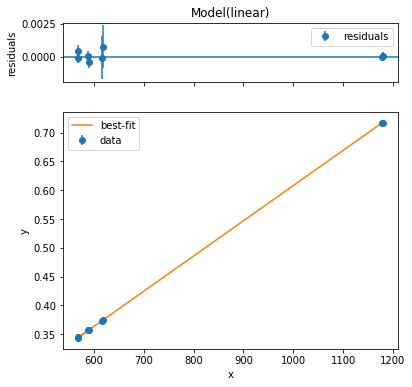

In [7]:
model = models.LinearModel()
ijkfit = model.fit(ijking.sin_hoek, x=ijking.m_lambda, weights=1/ijking.d_sin_hoek)
ijkfit.plot()
print(ijkfit.fit_report())

In [8]:
d = 1 / ijkfit.params['slope']

## Onbekende lamp

In [9]:
onbekend = pd.read_csv('onbekende_lamp.csv')

In [10]:
onbekend

,kleur,sterkte,orde,hoek,dhoek
0,paars,matig,1,13.40,0.025
1,paars,sterk,1,14.50,0.025
2,groen,zwak,1,16.55,0.025
3,groen,zwakker,1,16.70,0.025
4,groen,zeer sterk,1,18.60,0.025
5,oranje,sterk,1,19.70,0.025
6,oranje,sterk,1,19.80,0.025


In [11]:
onbekend['corr_hoek'] = onbekend.hoek + 0.70
onbekend['golflengte'] = d * np.sin(np.radians(onbekend.corr_hoek)) / onbekend.orde

In [12]:
onbekend['ref_golflengte'] = [404.7, 435.8, 491.6, np.nan, 546.1, 577.1, 579.1]
onbekend

,kleur,sterkte,orde,hoek,dhoek,corr_hoek,golflengte,ref_golflengte
0,paars,matig,1,13.40,0.025,14.10,398.475065,404.7
1,paars,sterk,1,14.50,0.025,15.20,428.856372,435.8
2,groen,zwak,1,16.55,0.025,17.25,485.045739,491.6
3,groen,zwakker,1,16.70,0.025,17.40,489.133647,NaN
4,groen,zeer sterk,1,18.60,0.025,19.30,540.614239,546.1
5,oranje,sterk,1,19.70,0.025,20.40,570.150699,577.1
6,oranje,sterk,1,19.80,0.025,20.50,572.825574,579.1


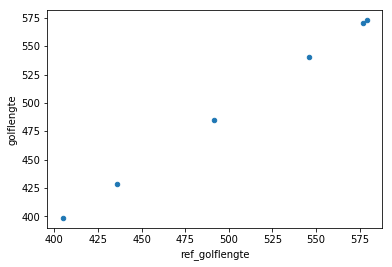

In [13]:
onbekend.plot.scatter('ref_golflengte', 'golflengte')

ValueError: x and y must have same first dimension, but have shapes (6,) and (7,)

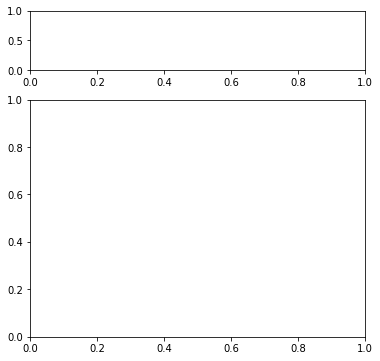

In [14]:
model = models.LinearModel()
kwik_fit = model.fit(onbekend.golflengte, x=onbekend.ref_golflengte, nan_policy='omit')
kwik_fit.plot()
print(kwik_fit.fit_report())

In [ ]:
onbekend.dtypes

In [ ]:
kwik_fit.data